# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
mars_html = browser.html
mars_html_soup = soup(mars_html, 'html.parser')

In [5]:
# Extract all rows for headers
temp_header = mars_html_soup.find_all('th')
temp_header

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [6]:
# Extract all rows for data
temp_data = mars_html_soup.find_all('tr',class_='data-row')
temp_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [7]:
# Create an empty list for header
mars_header = []

# Extract and store header into list
for header in temp_header:
    mars_header.append(header.text)
mars_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Create an empty list for data
mars_data = []

# Extract and store mars_date into list
for temp in temp_data:
    temp_row = []
    for data in temp.find_all('td'):
        temp_row.append(data.text)
    mars_data.append(temp_row)
mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_data, columns=mars_header)

In [10]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
#Alternatively, use read_html, then get table
mars_html2 = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_html2[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Store table into variable and confirm dataframe
mars_weather_df2 = mars_html2[0]
mars_weather_df2.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
# Inpect dataframe
mars_weather_df.tail(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1857,1886,2018-02-18,1968,131,5,-76.0,732.0
1858,1887,2018-02-19,1969,131,5,-76.0,732.0
1859,1888,2018-02-20,1970,132,5,-77.0,731.0
1860,1890,2018-02-21,1971,132,5,-78.0,731.0
1861,1891,2018-02-22,1972,133,5,-78.0,730.0
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [14]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
# Change to numeric
mars_weather_df[['id']] = mars_weather_df[['id']].apply(pd.to_numeric)
mars_weather_df[['sol']] = mars_weather_df[['sol']].apply(pd.to_numeric)
mars_weather_df[['ls']] = mars_weather_df[['ls']].apply(pd.to_numeric)
mars_weather_df[['min_temp']] = mars_weather_df[['min_temp']].apply(pd.to_numeric)
mars_weather_df[['pressure']] = mars_weather_df[['pressure']].apply(pd.to_numeric)
mars_weather_df[['month']] = mars_weather_df[['month']].apply(pd.to_numeric)

# Change to datatime format
mars_weather_df[['terrestrial_date']] = mars_weather_df[['terrestrial_date']].apply(pd.to_datetime)

In [16]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
# 1. How many months are there on Mars?
martian_month = mars_weather_df["month"].max()

print(f"There are {martian_month} martian months.")

There are 12 martian months.


In [18]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_weather_df["sol"].max()

print(f"There are {martian_days} martian days.")

There are 1977 martian days.


In [20]:
# 3. What is the average low temperature by month?
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean().reset_index()
avg_min_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


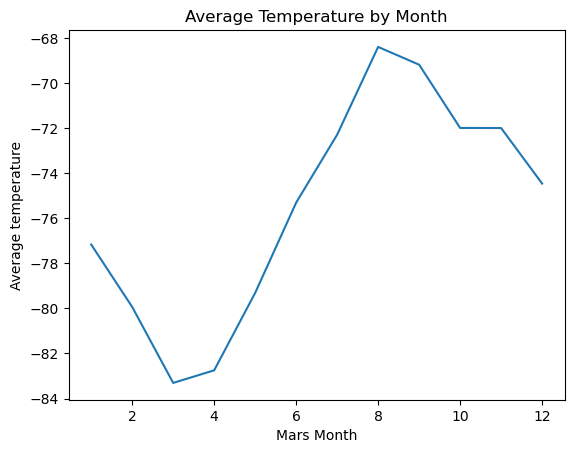

In [21]:
# Plot the average temperature by month
month = avg_min_temp['month']
avg_temp = avg_min_temp['min_temp']

plt.plot(month, avg_temp)
plt.xlabel('Mars Month')
plt.ylabel('Average temperature')
plt.title('Average Temperature by Month')
plt.show()

In [22]:
# Identify the coldest and hottest months in Curiosity's location
hottest = avg_min_temp.loc[avg_min_temp['min_temp'].idxmax()].reset_index()

hottest_month = hottest.iloc[0,1]

coldest = avg_min_temp.loc[avg_min_temp['min_temp'].idxmin()].reset_index()

coldest_month = coldest.iloc[0,1]

print(f"The hottest month is month of {hottest_month}, and the coldest month is month of {coldest_month}.")

The hottest month is month of 8.0, and the coldest month is month of 3.0.


In [23]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean().reset_index()
avg_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


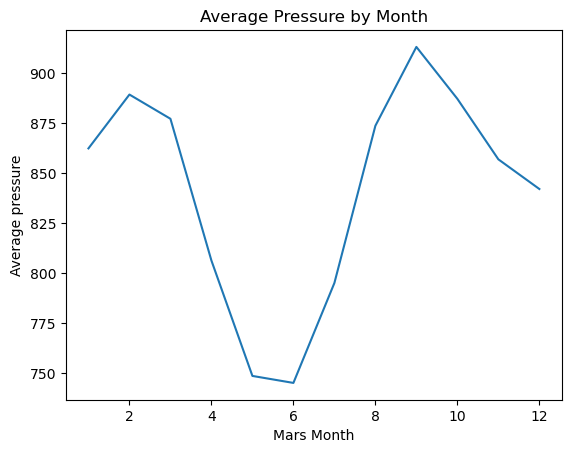

In [24]:
# Plot the average pressure by month
month2 = avg_pressure['month']
avg_pressure = avg_pressure['pressure']

plt.plot(month2, avg_pressure)
plt.xlabel('Mars Month')
plt.ylabel('Average pressure')
plt.title('Average Pressure by Month')
plt.show()

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# The solar longitude Ls is the Mars-Sun angle, measured from the Northern Hemisphere spring equinox where Ls=0.
# Ls=90 thus corresponds to northern summer solstice, just as Ls=180 marks the northern autumn equinox and Ls=270 the northern winter solstice.
# refer to http://www-mars.lmd.jussieu.fr/mars/time/solar_longitude.html

# ls=0, start of spring equinox, get the terrestial start dates that corresponds to this ls=0
start_dates = mars_weather_df['terrestrial_date'].loc[(mars_weather_df['ls']==0)]

# Get the first date of spring equinox
start = start_dates.iloc[0]

# ls=359, end of winter solstice, where 270 is start is winter solstice, get the terrestial end dates that corresponds to this ls=359
end_dates = mars_weather_df['terrestrial_date'].loc[(mars_weather_df['ls']==359)]

# Get the first date of after the first date of spring equinox
end = end_dates.iloc[3]

# End (ls=359) - start (ls=0) = number of earth_days
earth_days = end - start
print(f'{earth_days.days} days')

686 days


In [27]:
# Export and save csv file
mars_weather_df.to_csv("Output/mars_weather_df.csv", index=False, header=True)

In [28]:
browser.quit()